# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
%matplotlib inline

# Q1

In [2]:
#Importing the dataset
df = pd.read_csv('train.txt',header=None,names=['User','Product','Rating'])
df.head()

,User,Product,Rating
0,(User 88803,Product 22577,Rating 0.0)
1,(User 88803,Product 20520,Rating 4.0)
2,(User 88803,Product 91820,Rating 1.0)
3,(User 88803,Product 45584,Rating 7.0)
4,(User 88803,Product 98857,Rating 6.0)


In [3]:
#Cleaning
df['Rating'] = df['Rating'].str.findall(r'\d+\.\d+').apply(lambda x:x[0])
df['User'] = df['User'].str.findall(r'\d+').apply(lambda x:x[0])
df['Product'] = df['Product'].str.findall(r'\d+').apply(lambda x:x[0])
df['User'] = df['User'].astype('int')
df['Product'] = df['Product'].astype('int')
df['Rating'] = df['Rating'].astype('float')

# Total Number of Users

In [4]:
#Total Number of Users
df['User'].nunique()

500

# Total Number of Products

In [5]:
#Total Number of Products
df['Product'].nunique()

100

# Q2

In [6]:
#Obtaining the Matrix Y
matrix = pd.pivot_table(df,values='Rating',index='User',columns='Product')
matrix.shape

(500, 100)

In [7]:
matrix

Product,123,1208,1785,1855,2114,2811,5351,5871,7230,7343,...,84017,85457,86102,88273,88523,91484,91736,91820,98071,98857
User,,,,,,,,,,,,,,,,,,,,,
76,NaN,9.0,NaN,8.0,3.0,4.0,9.0,7.0,NaN,6.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,6.0,NaN,NaN,NaN,NaN,1.0,NaN,8.0,...,4.0,0.0,NaN,NaN,8.0,NaN,0.0,6.0,2.0,0.0
337,NaN,NaN,3.0,0.0,0.0,1.0,3.0,1.0,0.0,8.0,...,NaN,4.0,2.0,NaN,NaN,NaN,NaN,0.0,NaN,3.0
707,9.0,NaN,NaN,2.0,3.0,8.0,NaN,NaN,NaN,8.0,...,NaN,3.0,1.0,3.0,9.0,6.0,1.0,9.0,NaN,1.0
807,1.0,6.0,2.0,5.0,7.0,2.0,8.0,4.0,NaN,10.0,...,NaN,0.0,10.0,0.0,0.0,NaN,NaN,NaN,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,2.0,NaN,NaN,9.0,NaN,1.0,8.0,8.0,NaN,7.0,...,NaN,0.0,8.0,3.0,NaN,NaN,5.0,2.0,9.0,NaN
97887,0.0,NaN,6.0,NaN,0.0,3.0,5.0,4.0,10.0,9.0,...,2.0,8.0,NaN,6.0,NaN,NaN,6.0,NaN,4.0,NaN
98352,3.0,NaN,1.0,0.0,NaN,3.0,2.0,6.0,0.0,5.0,...,1.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0


# Q3

In [8]:
average_ratings = df.groupby("Product")["Rating"].mean()

# Display the average ratings
print(average_ratings)

Product
123      2.779264
1208     4.123711
1785     2.654237
1855     4.103774
2114     4.259259
           ...   
91484    2.575342
91736    4.530201
91820    2.781879
98071    4.215753
98857    3.986207
Name: Rating, Length: 100, dtype: float64


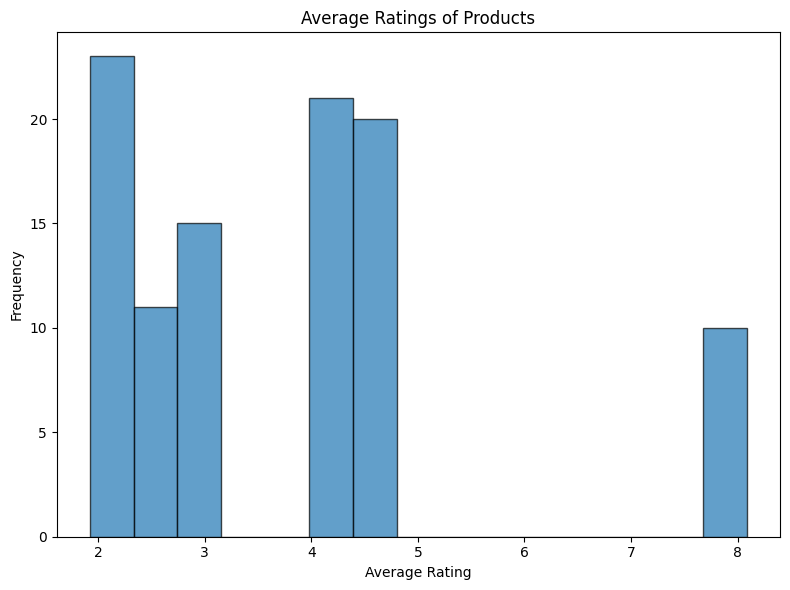

In [11]:
# Plotting the histogram for average ratings of products
average_ratings = df.groupby('Product')['Rating'].mean()

plt.figure(figsize=(8, 6))  # Set the figure size for better presentation

plt.hist(average_ratings, bins=15, edgecolor='black', alpha=0.7)  # Adjust the number of bins as needed
plt.title("Average Ratings of Products")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.tight_layout()  # Ensuring proper spacing between elements
plt.show()

# Q4

In [12]:
#Top 5 Worst Products
df.groupby('Product')['Rating'].mean().sort_values()[:5]

Product
56033    1.920530
72533    1.954839
22577    1.976898
16430    2.013468
60751    2.034247
Name: Rating, dtype: float64

# Q5

In [13]:
#Average Rating of each user
df.groupby('User')['Rating'].mean()

User
76       4.274194
287      3.737705
337      3.650794
707      4.433333
807      4.264706
           ...   
97877    4.100000
97887    4.904762
98352    3.983333
98435    4.193548
98800    4.111111
Name: Rating, Length: 500, dtype: float64

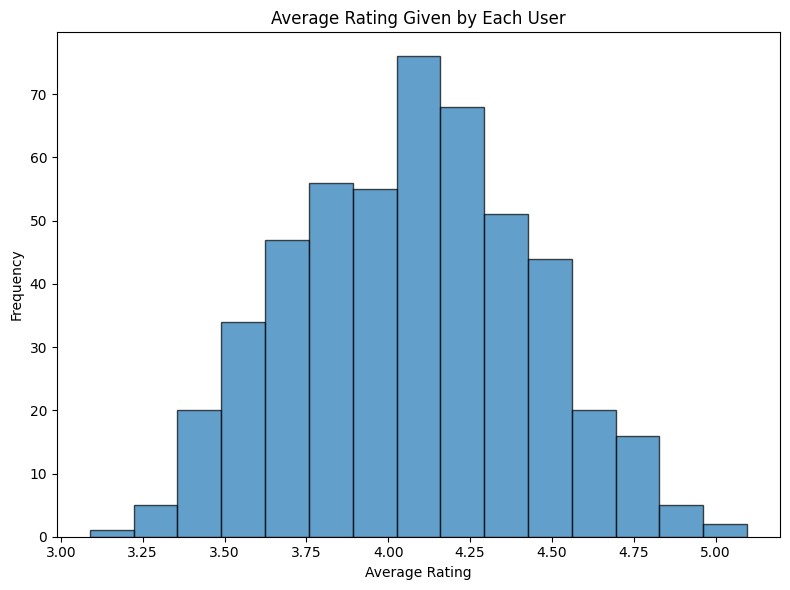

In [16]:
average_ratings_per_user = df.groupby('User')['Rating'].mean()

plt.figure(figsize=(8, 6))  # Set the figure size for better presentation

plt.hist(average_ratings_per_user, bins=15, edgecolor='black', alpha=0.7)  # Adjust the number of bins as needed
plt.title('Average Rating Given by Each User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()  # Ensuring proper spacing between elements
plt.show()

# Q6

In [13]:
#Top 5 generous users based on average rating
df.groupby('User')['Rating'].mean().sort_values(ascending=False)[:5]

User
31410    5.096154
73310    5.061538
97887    4.904762
77730    4.896552
20146    4.890625
Name: Rating, dtype: float64

# Q7

In [14]:
#Importing the test.txt data
test = pd.read_csv('test.txt',header=None,names=['User','Product','Rating'])
test.head()

,User,Product,Rating
0,(User 88803,Product test0,Rating 5.0)
1,(User 88803,Product test1,Rating 3.0)
2,(User 43726,Product test0,Rating 8.0)
3,(User 23325,Product test0,Rating 1.0)
4,(User 23325,Product test1,Rating 4.0)


In [15]:
#Data Cleaning
test['Rating'] = test['Rating'].str.findall(r'\d+\.\d+').apply(lambda x:x[0])
test['User'] = test['User'].str.findall(r'\d+').apply(lambda x:x[0])
test['Product'] = test['Product'].str.findall(r'\d+').apply(lambda x:x[0])
test['User'] = test['User'].astype('int')
test['Product'] = test['Product'].astype('int')
test['Rating'] = test['Rating'].astype('float')

In [16]:
#Number of Users
test['User'].nunique()

421

In [17]:
#Number of Products
test['Product'].nunique()

2

# Q8

In [18]:
#Matrix X
xmatrix = pd.pivot_table(test,values='Rating',index='User',columns='Product')

In [19]:
xmatrix.shape

(421, 2)

In [20]:
xmatrix

Product,0,1
User,,
287,4.0,4.0
337,NaN,10.0
707,3.0,NaN
807,NaN,3.0
1103,NaN,7.0
...,...,...
97877,NaN,1.0
97887,NaN,2.0
98352,6.0,6.0


# Q9

In [21]:
#Finding out only test and train products
test_products = list(test.Product.unique())
train_products = list(df.Product.unique())

In [22]:
#Extracting a list of common users
common_users = list(set(matrix.index.to_list()).intersection(set(xmatrix.index.to_list())))

In [23]:
#Writing code for Manhattan Distance
d={}
for test_product in test_products:
    d[test_product]={}
    for train_product in train_products:
        d[test_product][train_product]=0
        for user in common_users:
            if math.isnan(xmatrix[test_product][user]) or math.isnan(matrix[train_product][user]):
                continue
            else:
                d[test_product][train_product]+=abs(xmatrix[test_product][user]-matrix[train_product][user])

In [24]:
#Top 5 similar products in train.txt for each product in test.txt
for test_product in test_products:
    print(f'The top 5 products and their distance score in train.txt for Product {test_product} in test.txt are:')
    temp=sorted(d[test_product].items(),key=lambda x:x[1])[:5]
    print(temp)

The top 5 products and their distance score in train.txt for Product 0 in test.txt are:
[(50408, 244.0), (58577, 272.0), (60734, 281.0), (38851, 281.0), (26457, 283.0)]
The top 5 products and their distance score in train.txt for Product 1 in test.txt are:
[(24785, 265.0), (26457, 297.0), (50408, 314.0), (40821, 315.0), (38851, 316.0)]


# Q12

In [25]:
d = {}

for test_product in test_products:
    d[test_product] = {}
    for train_product in train_products:
        d[test_product][train_product] = 0
        for user in common_users:
            if math.isnan(xmatrix[test_product][user]) or math.isnan(matrix[train_product][user]):
                continue
            else:
                d[test_product][train_product] += math.pow(abs(xmatrix[test_product][user] - matrix[train_product][user]), 2)

#Taking the square root of the sum of squared differences
for test_product in d:
    for train_product in d[test_product]:
        d[test_product][train_product] = math.sqrt(d[test_product][train_product])

#Top 5 most similar products in train data for each test product
top_similar_products = {}
for test_product in d:
    sorted_dist_dict = dict(sorted(d[test_product].items(), key=lambda item: item[1])[:5])
    top_similar_products[test_product] = sorted_dist_dict

#Results
for test_product, similar_products in top_similar_products.items():
    print(f"Test Product: {test_product}")
    for train_product, euclidean_dist in similar_products.items():
        print(f"  Similar Product: {train_product}, Euclidean Distance: {euclidean_dist}")


Test Product: 0
  Similar Product: 50408, Euclidean Distance: 27.018512172212592
  Similar Product: 58577, Euclidean Distance: 28.35489375751565
  Similar Product: 26457, Euclidean Distance: 28.75760768909681
  Similar Product: 60734, Euclidean Distance: 28.965496715920477
  Similar Product: 38851, Euclidean Distance: 29.0
Test Product: 1
  Similar Product: 24785, Euclidean Distance: 27.367864366808018
  Similar Product: 26457, Euclidean Distance: 29.410882339705484
  Similar Product: 40821, Euclidean Distance: 30.708305065568176
  Similar Product: 50408, Euclidean Distance: 31.176914536239792
  Similar Product: 41232, Euclidean Distance: 31.22498999199199


# Part B

# Data Collection

In [26]:
#Importing the dataset
df = pd.read_csv('Group 1.csv')
df.head()

,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,0,G1606,Female,Lancashire,0,1,0,20.0,NaN,2,0,Churn=No
1,1,F8889,Female,Essex,0,1,0,4.0,NaN,1,5,Churn=No
2,2,C5068,Female,Essex,0,Unknown,1,9.0,NaN,2,0,Churn=No
3,3,G9820,Male,West Yorkshire,1,1,1,9.0,NaN,4,9,Churn=No
4,4,H7261,Male,Greater Manchester,0,1,0,6.0,NaN,2,5,Churn=No


# Data Preparation

In [27]:
#Review the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7350 non-null   int64  
 1   customer_id   7350 non-null   object 
 2   gender        7350 non-null   object 
 3   location      7350 non-null   object 
 4   partner       7350 non-null   int64  
 5   dependents    7350 non-null   object 
 6   senior        7350 non-null   int64  
 7   Tenure        7350 non-null   float64
 8   monthly_cost  79 non-null     object 
 9   package       7350 non-null   int64  
 10  survey        7350 non-null   object 
 11  Class         7291 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 689.2+ KB


The columns are an ID column called Unnamed, customer_id which are pretty much useless.
monthly_cost can be computed using the dataset information.
survey is a score between 0 to 10, but it is an object datatype in this dataset.
Class has some missing values in the dataset - This is the target column which is categorical.

Before removing the 'customer_id' column, let me check if the entries are actually unique.

In [28]:
#Dropping the Unnamed:0 column and making a copy of the original dataframe
alt_df = df.drop('Unnamed: 0',axis=1)

In [29]:
#Dropping duplicates
alt_df = alt_df.drop_duplicates()

In [30]:
alt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 7349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   7000 non-null   object 
 1   gender        7000 non-null   object 
 2   location      7000 non-null   object 
 3   partner       7000 non-null   int64  
 4   dependents    7000 non-null   object 
 5   senior        7000 non-null   int64  
 6   Tenure        7000 non-null   float64
 7   monthly_cost  76 non-null     object 
 8   package       7000 non-null   int64  
 9   survey        7000 non-null   object 
 10  Class         6944 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 656.2+ KB


There were 350 duplicate rows, which are successfuly removed.

Now I'll remove the customer_id column, because it serves no purpose.

In [31]:
#Dropping the customer_id column
alt_df.drop('customer_id',axis=1,inplace=True)

In [32]:
#Extracting only rows where Tenure is 0 or positive
alt_df = alt_df[alt_df['Tenure']>=0]


I'll remove the 'Class' feature with missing values too, because it is the output feature and I can't just impute it with a random value. Furthermore, only a small subset of the data is missing.

In [33]:
#Drop null values from the Class feature
alt_df.dropna(subset='Class',inplace=True)

In [34]:
#Checking the number of unique values in the 'Gender' column
alt_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [35]:
#Checking the number of unique values in the 'Location' column
alt_df['location'].unique()

array(['Lancashire', 'Essex', 'West Yorkshire', 'Greater Manchester',
       'West Midlands', 'Greater London', 'Merseyside', 'Hertfordshire',
       'Devon', 'North Yorkshire', 'Hampshire', 'Kent', 'Surrey',
       'Staffordshire', 'South Yorkshire', 'Nottinghamshire',
       'Tyne and Wear'], dtype=object)

In [36]:
#Checking the number of unique values in the 'Partner' column
alt_df['partner'].unique()

array([0, 1])

In [37]:
alt_df['dependents'].unique() #It is categorical - Yes, No, Unknown.

array(['1', 'Unknown', '0'], dtype=object)

In [38]:
alt_df['senior'].unique() #It is a categorical variable

array([0, 1])

In [39]:
alt_df['package'].unique() #Categorical and Ordinal

array([2, 1, 4, 3])

In [40]:
alt_df['survey'].unique() #Categorical and Ordinal

array(['0', '5', '9', '2', '8', '7', '6', '1', 'No reply', '4', '3', '10'],
      dtype=object)

In [41]:
alt_df['Class'].unique() #Inconsistency in the Class feature

array(['Churn=No', 'Churn=Yes', 'Y$e$s$$'], dtype=object)

# Cleaning the target feature 'Class'

In [42]:
#Function to clean into 'Yes' or 'No' only
def extract_pattern(value):
    if not pd.isna(value):
        if 'Yes' in value:
            return 'Yes'
        else:
            return 'No'
    else:
        return None
    

In [43]:
alt_df['Class'] = alt_df['Class'].apply(extract_pattern)

In [44]:
#Verifying if the Class feature is cleaned.
alt_df['Class'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
#Converting the numbers in 'survey' to correct format
def convert_to_number(value):
    if value.isdigit():  # Check if the value is a valid digit
        return int(value)
    else:
        return value
alt_df['survey'] = alt_df['survey'].apply(convert_to_number)

In [46]:
#Impute our survey scores with the mode
mode_scores = alt_df['survey'].mode()[0]
alt_df['survey'] = alt_df['survey'].apply(lambda x:mode_scores if x=='No reply' else x)
alt_df['survey'] = alt_df['survey'].apply(lambda x:int(x)) #Convert to integer

# EDA

Hypotheses:
1. People who had a higher value of tenure are less likely to churn as they are already comfortable with the company's services and will not likely move to another.
2. People who have a lower survey score are more likely to churn as it indicates that they aren't satisfied with the company's services and want to explore other options.

For this, we'll have to know the monthly_cost values. I'm estimating the monthly_cost of package 4 to be 54 a month.

In [47]:
#Filling the monthly_cost column
costs = {1:26,2:34,3:40,4:54}
alt_df['monthly_cost'] = alt_df['package'].map(costs)

In [48]:
#Function to compute lifetime value
def calc_lifetime_value(monthly_cost,tenure):
    total = 0
    for i in range(int(tenure)):
        total += 12*monthly_cost
        if i<25:
            monthly_cost = monthly_cost - 0.02*monthly_cost
    return total
alt_df['lifetime_value'] = alt_df.apply(lambda row: calc_lifetime_value(row['monthly_cost'], row['Tenure']), axis=1)

# Univariate Analysis

Text(0.5, 1.0, 'Churn Comparison with Partner Class')

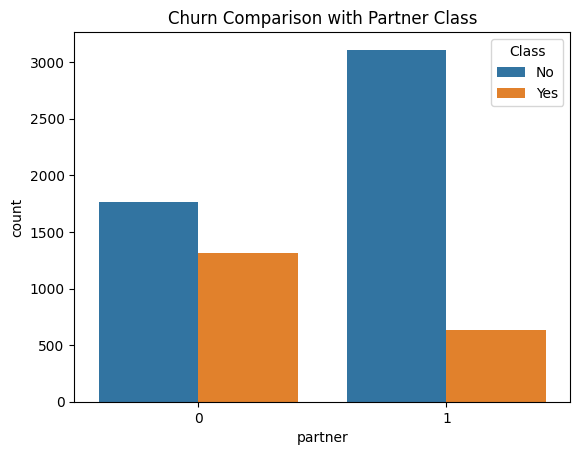

In [49]:
#Churn vs Partner
sns.countplot(data=alt_df,x='partner',hue='Class')
plt.title('Churn Comparison with Partner Class')

Text(0.5, 1.0, 'Churn Comparison with Senior Class')

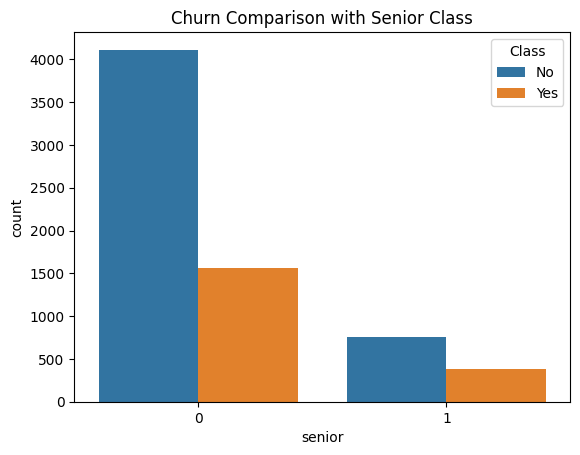

In [50]:
#Churn vs Senior
sns.countplot(data=alt_df,x='senior',hue='Class')
plt.title('Churn Comparison with Senior Class')

Text(0.5, 1.0, 'Churn vs Dependents Class')

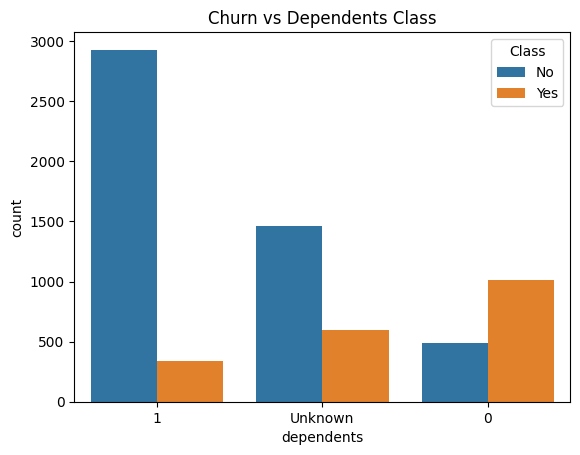

In [51]:
#Churn vs Dependents
sns.countplot(data=alt_df,x='dependents',hue='Class')
plt.title('Churn vs Dependents Class')

Text(0.5, 1.0, 'Churn Comparison among Gender')

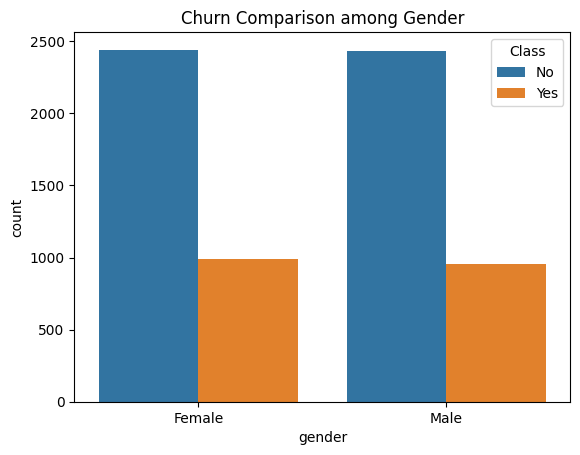

In [52]:
#Churn vs Gender
sns.countplot(data=alt_df,x='gender',hue='Class')
plt.title('Churn Comparison among Gender')

Text(0.5, 1.0, 'Churn vs Tenure')

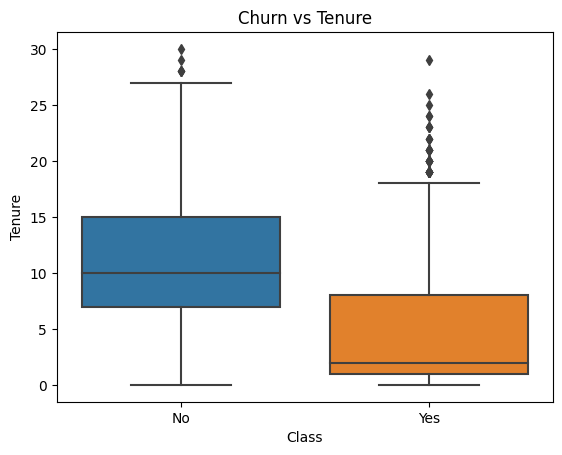

In [53]:
#Churn vs Tenure
sns.boxplot(data=alt_df,x='Class',y='Tenure')
plt.title('Churn vs Tenure')

In [54]:
#Average Tenure values for each churn and non-churn
alt_df.groupby('Class')['Tenure'].mean()

Class
No     10.630337
Yes     4.471253
Name: Tenure, dtype: float64

As expected, those who stayed with the company for a longer period of time were less likely to churn.

Text(0.5, 1.0, 'Churn vs Survey Scores')

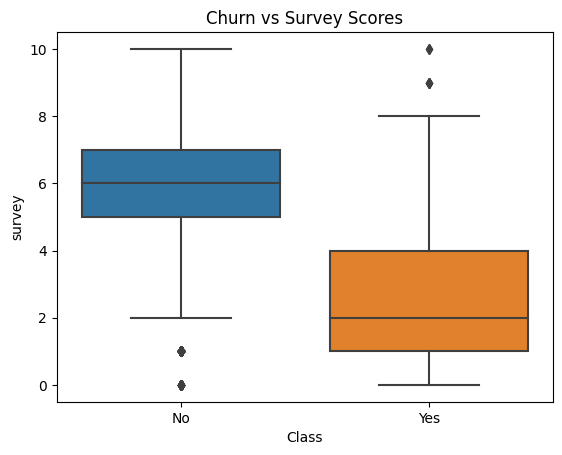

In [55]:
#Churn vs Survey
sns.boxplot(data=alt_df,x='Class',y='survey')
plt.title('Churn vs Survey Scores')

In [56]:
#Average Survey scores for churn vs non-churn
alt_df.groupby('Class')['survey'].mean()

Class
No     5.635468
Yes    2.717146
Name: survey, dtype: float64

Our hypothesis about lower scores and churn is accurate. Scores leaning more towards 'Poor' ratings were more likely to churn.

Visualize the lifetime value of customers:

Text(0, 0.5, 'Frequency')

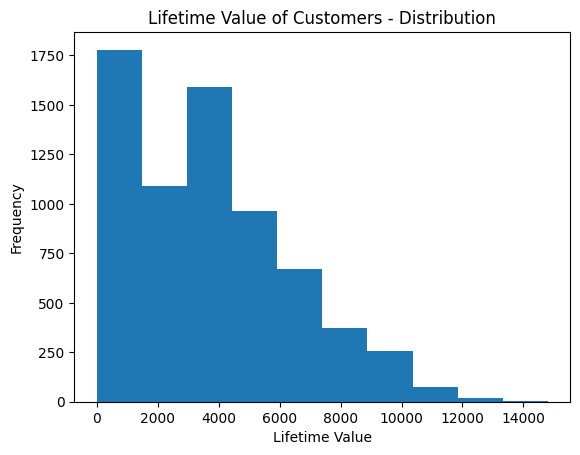

In [57]:
#Lifetime_value distribution
plt.hist(alt_df['lifetime_value'])
plt.title('Lifetime Value of Customers - Distribution')
plt.xlabel('Lifetime Value')
plt.ylabel('Frequency')

We can see that the lifetime value was heavily skewed to the right, which indicates that a lot of customers were actually new and hence did not have any significant contribution to the yearly revenue of the company.

We will have to convert it into a normal distribution by means of a boxcox transform. But first, let us examine the average lifetime value of churned vs non-churned customers.

In [58]:
#Average lifetime value for churn and non-churn
alt_df.groupby('Class')['lifetime_value'].mean()

Class
No     4442.533976
Yes    1686.722572
Name: lifetime_value, dtype: float64

Text(0.5, 1.0, 'Churn vs Lifetime Value')

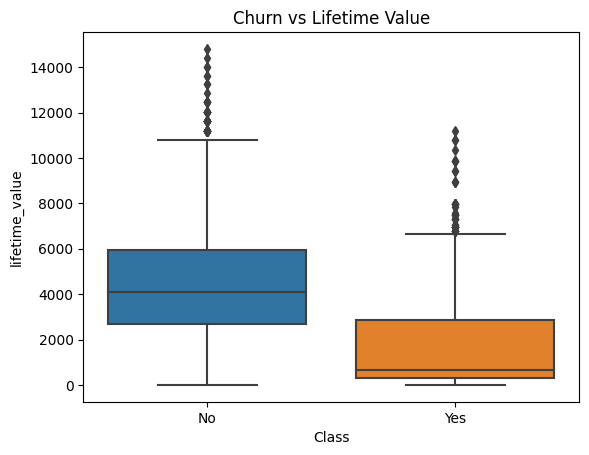

In [59]:
#Churn vs lifetime_value
sns.boxplot(data=alt_df,x='Class',y='lifetime_value')
plt.title('Churn vs Lifetime Value')

Text(0.5, 1.0, 'Churn in each Location')

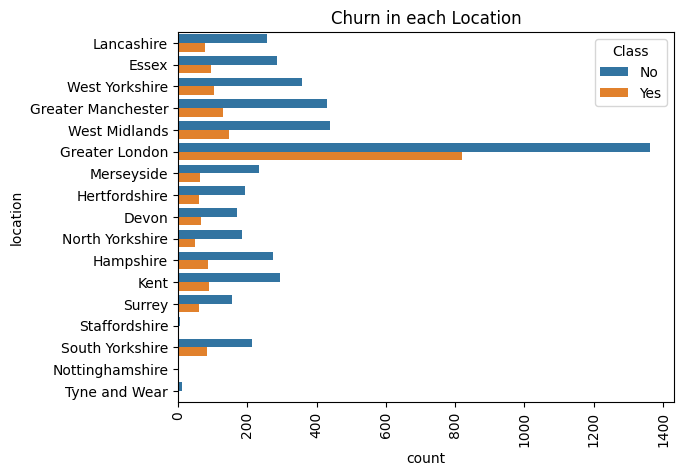

In [60]:
#Churn vs Location
sns.countplot(alt_df,y='location',hue=alt_df['Class'])
plt.xticks(rotation=90)
plt.title('Churn in each Location')

Location does not make much of a difference in the dataset.

Text(0.5, 1.0, 'Churn Comparison with Package')

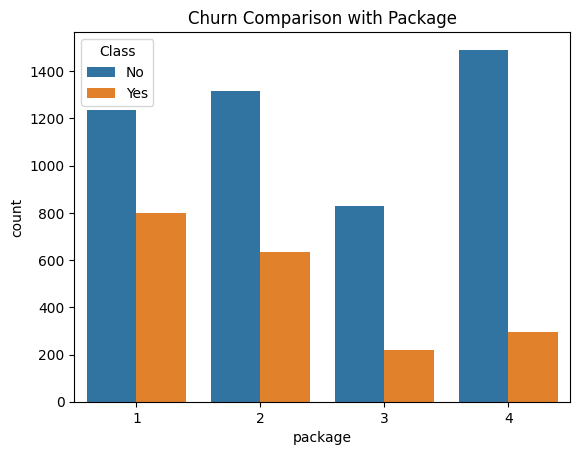

In [61]:
#Churn vs Package
sns.countplot(alt_df,x='package',hue=alt_df['Class'])
plt.title('Churn Comparison with Package')

# Feature Engineering

In [62]:
#Split the data
#Remove the monthly_cost column as the information is already encoded in package.
#Label Encode Class, gender and dependents.
#Transform the lifetime_value column to make it more normal.

In [63]:
#Dropping monthly_cost
alt_df.drop('monthly_cost',axis=1,inplace=True)

In [64]:
#Dropping location
alt_df.drop('location',axis=1,inplace=True)

In [65]:
#Splitting data into train and test sets
X = alt_df.drop('Class',axis=1)
y = alt_df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [66]:
#Label encoding the necessary columns
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])
X_train['dependents'] = le.fit_transform(X_train['dependents'])
X_test['dependents'] = le.transform(X_test['dependents'])
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [67]:
#Box-cox transformation on lifetime_value column
X_train['lifetime_value_transformed'], lambda_param_train = boxcox(X_train['lifetime_value'] + 1)
X_test['lifetime_value_transformed'] = boxcox(X_test['lifetime_value'] + 1, lmbda=lambda_param_train)
X_train.drop('lifetime_value',axis=1,inplace=True)
X_test.drop('lifetime_value',axis=1,inplace=True)

# ML Modeling

In [68]:
#Dictionary to store the results for each model
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'True Positives': [],
    'False Positives': [],
    'True Negatives': [],
    'False Negatives': [],
    'Precision': [],
    'Sensitivity (Recall)': [],
    'Specificity': []
}

#Function to calculate  recall and specificity
def sensitivity_specificity(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

#evaluation metrics for Logistic Regression
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
precision_lr = precision_score(y_test, y_test_pred_lr)
recall_lr = recall_score(y_test, y_test_pred_lr)
sensitivity_lr, specificity_lr = sensitivity_specificity(conf_matrix_lr)

#Append results to the dictionary
results['Model'].append('Logistic Regression')
results['Train Accuracy'].append(train_accuracy_lr)
results['Test Accuracy'].append(test_accuracy_lr)
results['True Positives'].append(conf_matrix_lr[1, 1])
results['False Positives'].append(conf_matrix_lr[0, 1])
results['True Negatives'].append(conf_matrix_lr[0, 0])
results['False Negatives'].append(conf_matrix_lr[1, 0])
results['Precision'].append(precision_lr)
results['Sensitivity (Recall)'].append(recall_lr)
results['Specificity'].append(specificity_lr)

#SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

#Gather evaluation metrics for SVM
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)
sensitivity_svm, specificity_svm = sensitivity_specificity(conf_matrix_svm)

#Append results to the dictionary
results['Model'].append('SVM')
results['Train Accuracy'].append(train_accuracy_svm)
results['Test Accuracy'].append(test_accuracy_svm)
results['True Positives'].append(conf_matrix_svm[1, 1])
results['False Positives'].append(conf_matrix_svm[0, 1])
results['True Negatives'].append(conf_matrix_svm[0, 0])
results['False Negatives'].append(conf_matrix_svm[1, 0])
results['Precision'].append(precision_svm)
results['Sensitivity (Recall)'].append(recall_svm)
results['Specificity'].append(specificity_svm)

#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

#Gather evaluation metrics for Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
sensitivity_rf, specificity_rf = sensitivity_specificity(conf_matrix_rf)

#Append results to the dictionary
results['Model'].append('Random Forest')
results['Train Accuracy'].append(train_accuracy_rf)
results['Test Accuracy'].append(test_accuracy_rf)
results['True Positives'].append(conf_matrix_rf[1, 1])
results['False Positives'].append(conf_matrix_rf[0, 1])
results['True Negatives'].append(conf_matrix_rf[0, 0])
results['False Negatives'].append(conf_matrix_rf[1, 0])
results['Precision'].append(precision_rf)
results['Sensitivity (Recall)'].append(recall_rf)
results['Specificity'].append(specificity_rf)

#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

#Gather evaluation metrics for Decision Tree
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
sensitivity_dt, specificity_dt = sensitivity_specificity(conf_matrix_dt)

#Append results to the dictionary
results['Model'].append('Decision Tree')
results['Train Accuracy'].append(train_accuracy_dt)
results['Test Accuracy'].append(test_accuracy_dt)
results['True Positives'].append(conf_matrix_dt[1, 1])
results['False Positives'].append(conf_matrix_dt[0, 1])
results['True Negatives'].append(conf_matrix_dt[0, 0])
results['False Negatives'].append(conf_matrix_dt[1, 0])
results['Precision'].append(precision_dt)
results['Sensitivity (Recall)'].append(recall_dt)
results['Specificity'].append(specificity_dt)

#Gradient Boost
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Gather evaluation metrics for Gradient Boost
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)
precision_gb = precision_score(y_test, y_test_pred_gb)
recall_gb = recall_score(y_test, y_test_pred_gb)
sensitivity_gb, specificity_gb = sensitivity_specificity(conf_matrix_gb)

#Append results to the dictionary
results['Model'].append('Gradient Boost')
results['Train Accuracy'].append(train_accuracy_gb)
results['Test Accuracy'].append(test_accuracy_gb)
results['True Positives'].append(conf_matrix_gb[1, 1])
results['False Positives'].append(conf_matrix_gb[0, 1])
results['True Negatives'].append(conf_matrix_gb[0, 0])
results['False Negatives'].append(conf_matrix_gb[1, 0])
results['Precision'].append(precision_gb)
results['Sensitivity (Recall)'].append(recall_gb)
results['Specificity'].append(specificity_gb)

#XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

#Gather evaluation metrics for XGBoost
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
precision_xgb = precision_score(y_test, y_test_pred_xgb)
recall_xgb = recall_score(y_test, y_test_pred_xgb)
sensitivity_xgb, specificity_xgb = sensitivity_specificity(conf_matrix_xgb)

#Append results to the dictionary
results['Model'].append('XGBoost')
results['Train Accuracy'].append(train_accuracy_xgb)
results['Test Accuracy'].append(test_accuracy_xgb)
results['True Positives'].append(conf_matrix_xgb[1, 1])
results['False Positives'].append(conf_matrix_xgb[0, 1])
results['True Negatives'].append(conf_matrix_xgb[0, 0])
results['False Negatives'].append(conf_matrix_xgb[1, 0])
results['Precision'].append(precision_xgb)
results['Sensitivity (Recall)'].append(recall_xgb)
results['Specificity'].append(specificity_xgb)

#Creating a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

#Sorting the DataFrame by test accuracy scores in descending order
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)


#Get the model name with the highest test accuracy
best_model_name = results_df.iloc[0]['Model']

#Get the best model name
best_model = None
if best_model_name == 'Logistic Regression':
    best_model = lr_model
elif best_model_name == 'SVM':
    best_model = svm_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
elif best_model_name == 'Gradient Boost':
    best_model = gb_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model

#Get feature importances for the best model
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

In [69]:
#Defining a function to convert a float to percentage
def float_to_percentage(value):
    return f"{value*100:.2f}%"

#Applying the function to the relevant columns
columns_to_convert = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Sensitivity (Recall)', 'Specificity']
results_df[columns_to_convert] = results_df[columns_to_convert].applymap(float_to_percentage)

#Print the DataFrame
results_df

,Model,Train Accuracy,Test Accuracy,True Positives,False Positives,True Negatives,False Negatives,Precision,Sensitivity (Recall),Specificity
4,Gradient Boost,92.12%,90.54%,299,51,936,78,85.43%,79.31%,94.83%
2,Random Forest,97.43%,89.74%,299,62,925,78,82.83%,79.31%,93.72%
5,XGBoost,95.71%,89.08%,291,63,924,86,82.20%,77.19%,93.62%
3,Decision Tree,97.43%,87.46%,288,82,905,89,77.84%,76.39%,91.69%
0,Logistic Regression,86.68%,86.73%,266,70,917,111,79.17%,70.56%,92.91%
1,SVM,83.32%,84.31%,236,73,914,141,76.38%,62.60%,92.60%


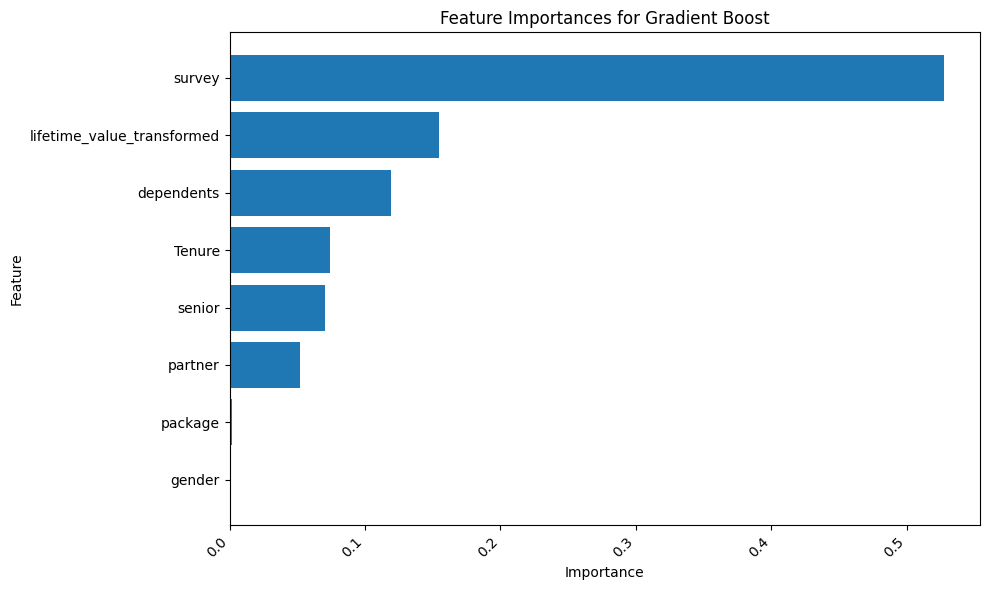

In [70]:
#Visualizing the feature importance
sorted_feature_importances = feature_importances.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importances.index, sorted_feature_importances.values)
plt.xticks(rotation=45, ha='right')
plt.title(f'Feature Importances for {best_model_name}')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()